# <center> Universidade Lusófona </center>
### Curso de Mestrado em Ciências de Dados 
##### Disciplina: Tópicos de Aprendizagem Automática
#### Autores
<li> Catarina Correia</li>
<li> Lais Mendonça</li>
<li> Lissette Montero Herrera</li>

# Dataset description

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area. The main goal is to classify tumors into malignant (cancerous) or benign(non-cancerous).

https://www.kaggle.com/fahmisajid/breast-cancer-classification/data

***
# <font color='green'> 1. Exploratory Data Analysis</font>
***
#### <font color='green'> Looking at the variables </font>

<font color='green'>Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine Learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.</font>



### <font color='green'>1.1 Importing the required libraries for EDA</font>

<font color='green'>Below are the libraries that are used in order to perform EDA (Exploratory data analysis)</font>



In [1]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import my_own_functions as my
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings('ignore')

### <font color='green'>1.2 Loading the data into the data frame</font>

<font color='green'>Loading the data into the pandas data frame.</font>

In [2]:
# Reading the dataset
df = pd.read_csv("breast-cancer.csv")
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
print (f"--> The dataset has {df.shape[0]} rows and {df.shape[1]} columns.\n")

--> The dataset has 569 rows and 32 columns.



In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


### <font color='green'>1.3 Checking the types of data</font>
<font color='green'>Here we check for the datatypes.</font>

In [5]:
# Checking data types
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### <font color='green'>1.4 Dropping irrelevant columns</font>
<font color='green'>This step is needed because sometimes there are columns that we won't use and, in such cases, dropping them is the best solution. In this case, the column 'id' doesn't make any sense.</font>

In [6]:
# Dropping unnecessary columns
df = df.drop(['id'],axis=1)
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<font color='green'>We then create a new variable, "features", that stores in a list the name of the features of the dataset, and another one to store the output variable "diagnosis", named "target".</font>

In [7]:
features = list(df.columns[1:])
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [8]:
target = df.columns[0]
target

'diagnosis'

### <font color='green'>1.5 Dropping the duplicate rows</font>
<font color='green'>A  data sets often has some duplicate data which might be disturbing.</font>

In [9]:
# Detecting duplicated rows
duplicate_df = df[df.duplicated()]
print(f"Number of Duplicate rows = {duplicate_df.shape[0]}")

Number of Duplicate rows = 0


<font color='green'>This dataset has no duplicate rows.</font>

### <font color='green'>1.6 Dropping the missing or null values</font>
<font color='green'>This is mostly similar to the previous step but in here all the missing values are detected and treated</font>

In [10]:
# Detecting missing values
print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


<font color='green'>We can check that this dataset has no missing values.</font>

### <font color='green'>1.7 Data Visualization</font>
<font color='green'>Histogram refers to the frequency of occurrence of variables in an interval and boxplots (complete).</font>

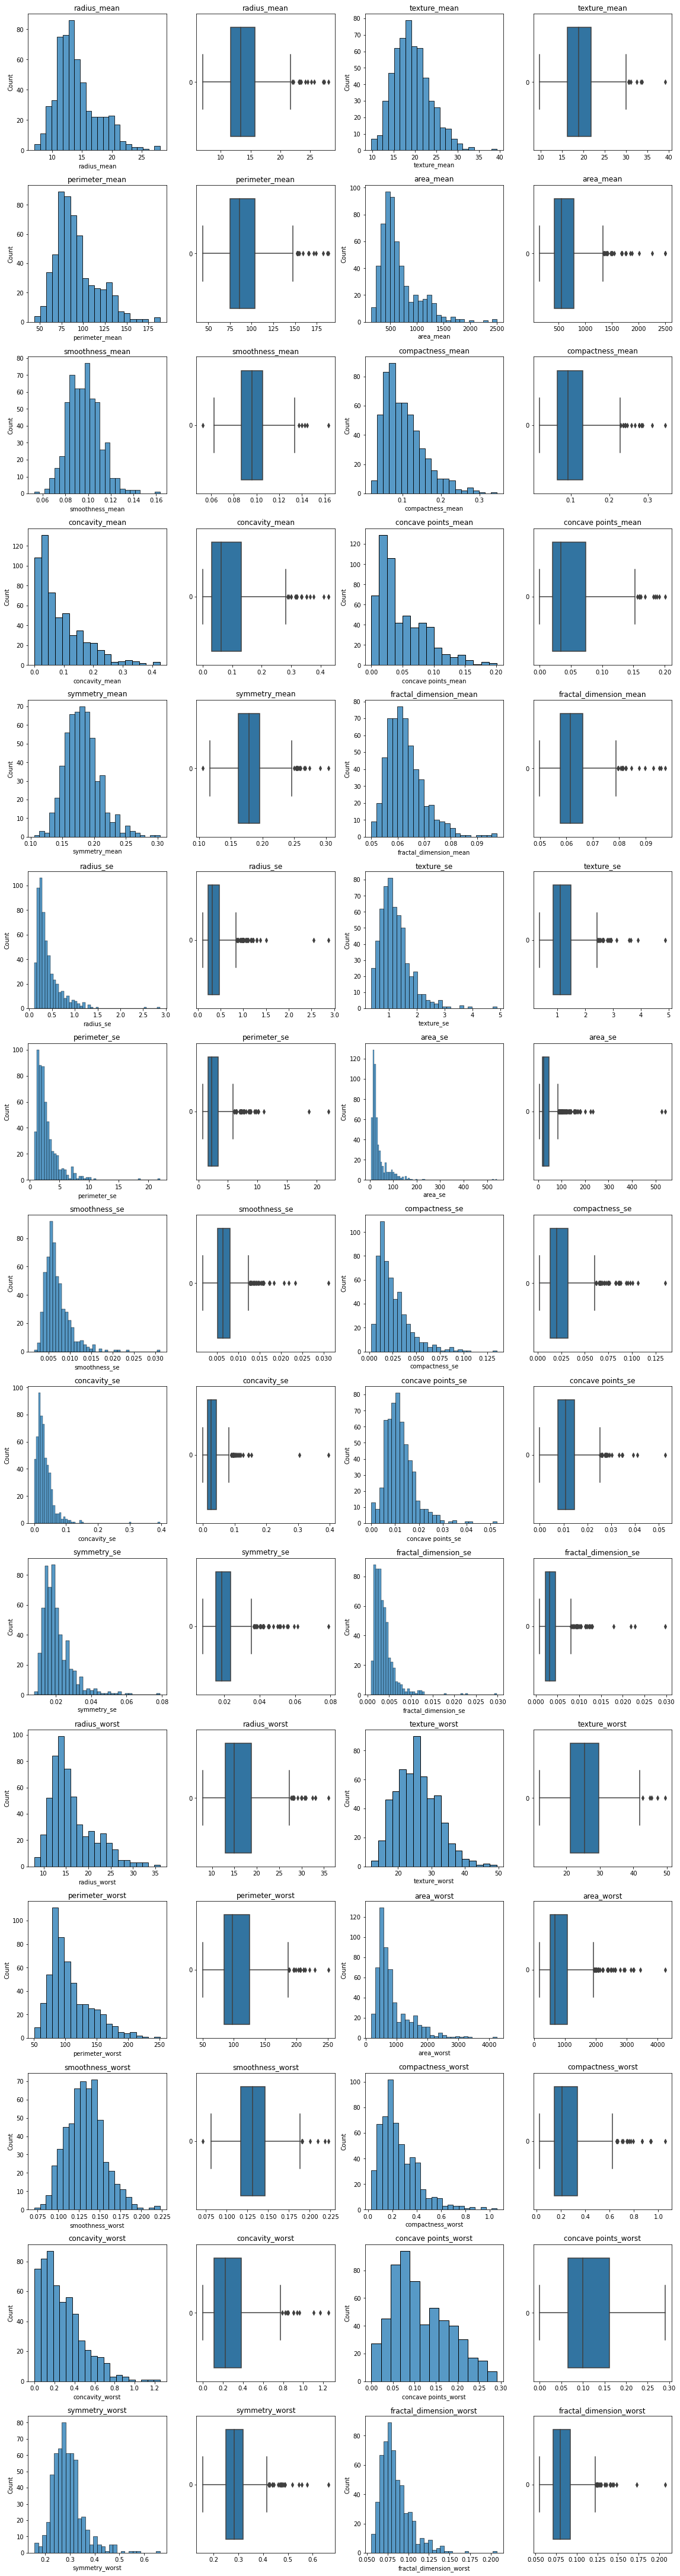

In [11]:
# Visualizing input variables
my.my_continuous_plot(df, features, 4, 4)

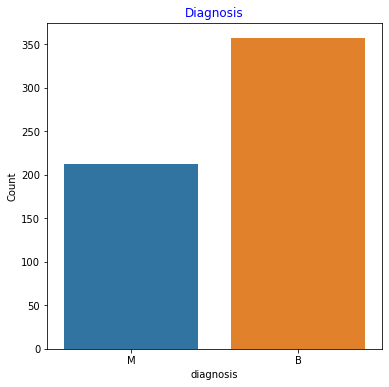

In [12]:
# Visualizing output variable
my.my_count_plot(df, target, 6, 6, 'Diagnosis', 'Count', 'blue', 12)

In [13]:
print ("\nCalculating percentage of each diagnosis:\n")
dict_diagnosis = dict(df.diagnosis.value_counts())
pct_B = (f"     B: {dict_diagnosis['B']} - {round(dict_diagnosis['B']/(dict_diagnosis['B']+dict_diagnosis['M'])*100,0)}%")
pct_M = (f"     M: {dict_diagnosis['M']} - {round(dict_diagnosis['M']/(dict_diagnosis['B']+dict_diagnosis['M'])*100,0)}%")

print (pct_M)
print (pct_B)
print ('        -----------')
print (f" Total: {(dict_diagnosis['B']+dict_diagnosis['M'])}")


Calculating percentage of each diagnosis:

     M: 212 - 37.0%
     B: 357 - 63.0%
        -----------
 Total: 569


# <font color='green'>2. Classification task</font>
<font color='green'> Classification is a process of categorizing a given set of data into classes
### <font color='green'>2.1 Split data set for training and testing</font>
<font color='green'>Pre-processing data.

<font color='green'>We create different samples for training and testing to help evaluate the model performance. This will allow us to evaluate the accuracy of the model that we will use, namely overfitting or underfitting.

<font color='green'>"*Creating different data samples for training and testing the model is the most common approach that can be used to identify these sort of issues. In this way, we can use the training set for training our model and then treat the testing set as a collection of data points that will help us evaluate whether the model can generalise well to new, unseen data."* in Towards Data Science.

<font color='green'>We split the dataset into two subsets: training with 30% of the data and testing with the remaining 70%.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df[features], 
                                                    df[target], 
                                                    test_size=0.3, 
                                                    shuffle=True)

In [15]:
X_train.shape

(398, 30)

In [16]:
X_test.shape

(171, 30)

### <font color='green'>2.2 Selection features</font>
<font color='green'>In order to select the features we will work with, we used the SelectKBest method and tested it in two ways, using the following parameters: 
    
    score_func = chi2 
            or 
    score_func = f_classif, k = 4
#### <font color='green'>Using score_func = chi2</font> 
<font color='green'>First, we plot all features to visualize which are most representative.</font> 

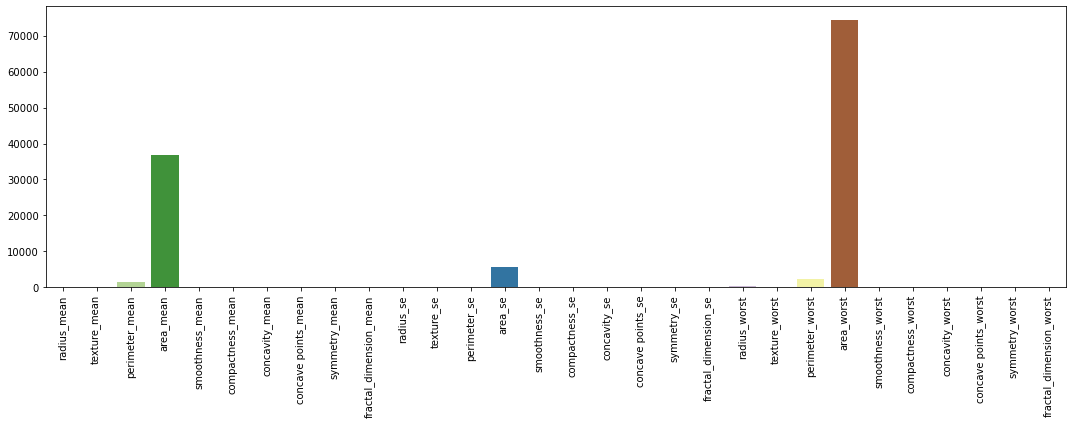

In [17]:
X_train_fs_chi2, X_test_fs_chi2, fs_chi2 = my.select_features(X_train, y_train, X_test, chi2, 'all')
my.my_barplot(features, fs_chi2.scores_, 15, 6)

<font color='green'>Then, we apply the SelectKBest method to extract the 4 main features:</font> 

In [18]:
X_train_fs_chi2, X_test_fs_chi2, fs_chi2 = my.select_features(X_train, y_train, X_test, chi2, 4)

In [19]:
X_train_fs_chi2

array([[178.8 ,  19.14,  57.17, 248.  ],
       [378.4 ,  17.85,  77.8 , 436.6 ],
       [406.3 ,  18.62,  80.88, 491.8 ],
       ...,
       [704.4 ,  44.91, 125.1 , 980.9 ],
       [396.5 ,  16.41,  83.99, 518.1 ],
       [577.9 ,  50.96, 110.6 , 897.  ]])

<font color='green'>And stored those features name's in a new variable which we will use to plot them:</font> 

In [20]:
features_chi2 = fs_chi2.get_feature_names_out()
features_chi2 

array(['area_mean', 'area_se', 'perimeter_worst', 'area_worst'],
      dtype=object)

<font color='green'>With the pairplot, we will see each of the 4 numeric variables in the above selected features related with all the other 3.</font> 

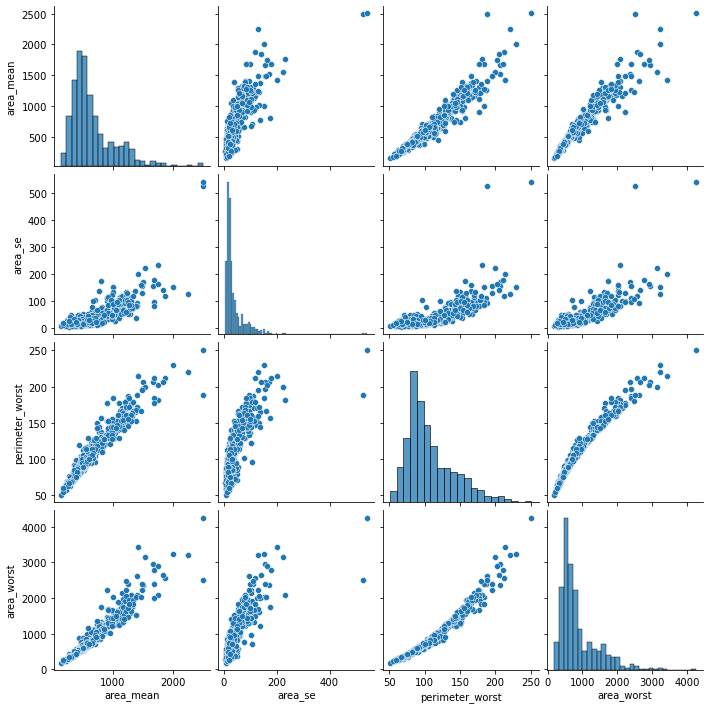

In [21]:
#scatterplot 
my.my_pair_plot(df[features_chi2], 2.5)

#### <font color='green'>Using score_func = f_classif</font> 
<font color='green'>Like with did above with chi2, we plot all features to visualize which are most representative.</font>

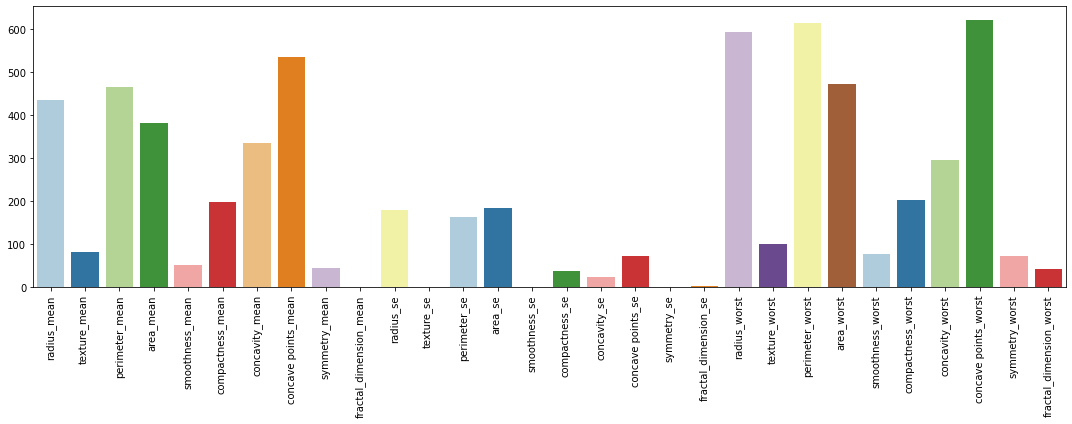

In [22]:
X_train_fs_fclassif, X_test_fs_fclassif, fs_fclassif = my.select_features(X_train, y_train, X_test, f_classif, 'all')
my.my_barplot(features, fs_fclassif.scores_, 15, 6)

<font color='green'>Then, we apply the SelectKBest method to extract the 4 main features:</font> 

In [23]:
X_train_fs_fclassif, X_test_fs_fclassif, fs_fclassif = my.select_features(X_train, y_train, X_test, f_classif, 4)

In [24]:
X_train_fs_fclassif

array([[0.000e+00, 9.077e+00, 5.717e+01, 0.000e+00],
       [2.257e-02, 1.202e+01, 7.780e+01, 6.413e-02],
       [2.929e-02, 1.265e+01, 8.088e+01, 9.608e-02],
       ...,
       [9.756e-02, 1.807e+01, 1.251e+02, 2.393e-01],
       [1.899e-02, 1.301e+01, 8.399e+01, 8.278e-02],
       [5.985e-02, 1.706e+01, 1.106e+02, 1.556e-01]])

<font color='green'>We can observe that the set of features that comes out of this method is diferent from the one above when we apllied chi2:</font> 

In [25]:
features_fclassif = fs_fclassif.get_feature_names_out()
features_fclassif

array(['concave points_mean', 'radius_worst', 'perimeter_worst',
       'concave points_worst'], dtype=object)

<font color='green'>With the pairplot, we will see each of the 4 numeric variables in the above selected features related with all the other 3.</font> 

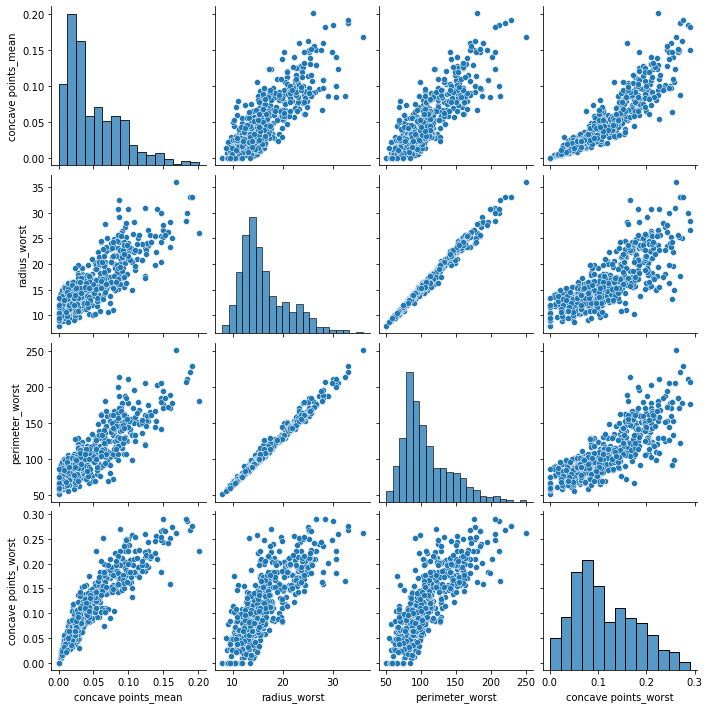

In [26]:
#scatterplot 
my.my_pair_plot(df[features_fclassif], 2.5)

### <font color='green'>2.3 Modeling</font>
<font color='green'>For the classification task, we will use naive bayes and KNN classificathion algoritms.</font>

### <font color='green'>Naive bayes classifier</font>
Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.
#### <font color='green'>Chi2 selection features results</font>

In [27]:
gnb = GaussianNB()

# Train classifier
gnb.fit(X_train_fs_chi2, y_train)

y_pred_chi2_gauss = gnb.predict(X_test_fs_chi2)
pct_chi2_gauss = round(100*(1-(y_test != y_pred_chi2_gauss).sum()/X_test_fs_chi2.shape[0]),0)

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test_fs_chi2.shape[0],
          (y_test != y_pred_chi2_gauss).sum(),
          pct_chi2_gauss)
)

Number of mislabeled points out of a total 171 points : 14, performance 92.00%


<font color='green'>We then observe the results through a **Confusion Matrix** which is a table that allows the visualization of the performance of a classification algorithm.</font>

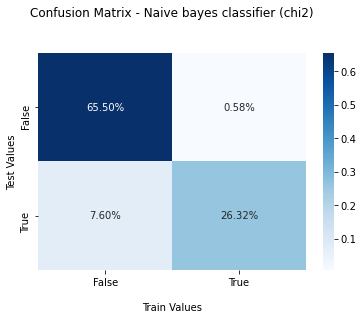

In [34]:
conf_matrix_bayes_chi2 = confusion_matrix(y_test, y_pred_chi2_gauss)
my.conf_matrix(conf_matrix_bayes_chi2, 'Confusion Matrix - Naive bayes classifier (chi2)\n\n', '\nTrain Values', 'Test Values')

#### <font color='green'>F_classif selection features results</font>

In [35]:
# Train classifier
gnb.fit(X_train_fs_fclassif, y_train)

y_pred_fclassif_gauss = gnb.predict(X_test_fs_fclassif)
pct_fclassif_gauss = round(100*(1-(y_test != y_pred_fclassif_gauss).sum()/X_test_fs_fclassif.shape[0]),0)

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test_fs_fclassif.shape[0],
          (y_test != y_pred_fclassif_gauss).sum(),
          pct_fclassif_gauss)
)

Number of mislabeled points out of a total 171 points : 7, performance 96.00%


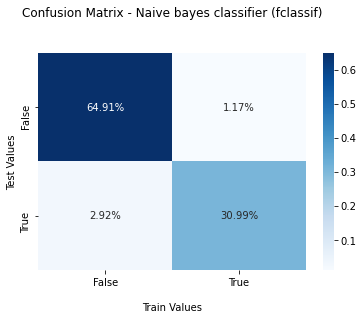

In [36]:
conf_matrix_bayes_fclassif = confusion_matrix(y_test, y_pred_fclassif_gauss)
my.conf_matrix(conf_matrix_bayes_fclassif, 'Confusion Matrix - Naive bayes classifier (fclassif)\n\n', '\nTrain Values', 'Test Values')

### <font color='green'>KNN classifier</font>
#### <font color='green'>Chi2 selection features results</font>

In [37]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train_fs_chi2,y_train)
y_pred_chi2_knn = knn.predict(X_test_fs_chi2) # predict = devolve classificação dada pelo modelo com a classificação do y_test (real)

pct_chi2_knn = round(100*(1-(y_test != y_pred_chi2_knn).sum()/X_test_fs_chi2.shape[0]),0)

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test_fs_chi2.shape[0],
          (y_test != y_pred_chi2_knn).sum(),
          pct_chi2_knn)
)

Number of mislabeled points out of a total 171 points : 13, performance 92.00%


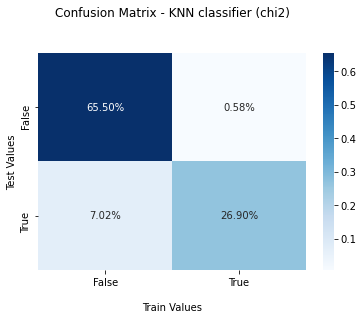

In [38]:
conf_matrix_knn_chi2 = confusion_matrix(y_test, y_pred_chi2_knn)
my.conf_matrix(conf_matrix_knn_chi2, 'Confusion Matrix - KNN classifier (chi2)\n\n', '\nTrain Values', 'Test Values')

#### <font color='green'>F_classif selection features results</font>

In [39]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train_fs_fclassif,y_train)
y_pred_fclassif_knn = knn.predict(X_test_fs_fclassif) # predict = devolve classificação dada pelo modelo com a classificação do y_test (real)

pct_fclassif_knn = round(100*(1-(y_test != y_pred_fclassif_knn).sum()/X_test_fs_fclassif.shape[0]),0)


# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test_fs_fclassif.shape[0],
          (y_test != y_pred_fclassif_knn).sum(),
          pct_fclassif_knn))

Number of mislabeled points out of a total 171 points : 14, performance 92.00%


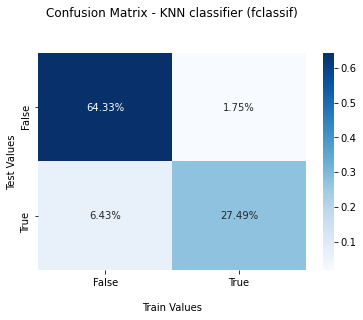

In [40]:
conf_matrix_knn_fclassif = confusion_matrix(y_test, y_pred_fclassif_knn)
my.conf_matrix(conf_matrix_knn_fclassif, 'Confusion Matrix - KNN classifier (fclassif)\n\n', '\nTrain Values', 'Test Values')

### <font color='green'>Comparing results</font>
<font color='green'>In the modellig process, we used **Naive Bayes** and **KNN** classificathion algoritms. We also used two diferente methods (**chi2** and **fclassif**) for the selection features process. </font>


<font color='green'>Thus, to make the difference between the different methods clearer, we summarize the results of each process in the following plot, showing the percent of non mislabeled points.
</font>

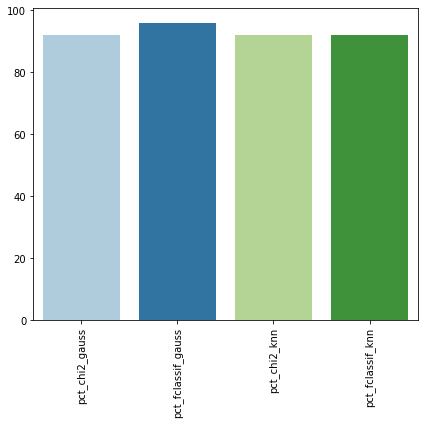

In [42]:
X = ['pct_chi2_gauss','pct_fclassif_gauss','pct_chi2_knn','pct_fclassif_knn']
Y = [pct_chi2_gauss,pct_fclassif_gauss,pct_chi2_knn,pct_fclassif_knn]
my.my_barplot(X, Y, 6, 6)